# Perkenalan

Nama      : Immanuel Yosia Alfrenco

Batch     : FTDS-015

Dataset   : Ease My Trip Plane Ticket Dataset

Objective : Melakukan prediksi harga tiket pesawat berdasarkan dataset yang ada.


# Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import joblib
import json
import pickle

import warnings
warnings.filterwarnings('ignore')

# Untuk connect Google Drive
from google.colab import drive

# Untuk membuat model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Untuk menyiapkan dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Untuk evaluasi model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Data Loading

In [2]:
# Menghubungkan Colab dengan Google Drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Unzip dataset yang akan digunakan

!unzip gdrive/My\ Drive/Dataset/Clean_Dataset.csv.zip

Archive:  gdrive/My Drive/Dataset/Clean_Dataset.csv.zip
  inflating: Clean_Dataset.csv       


In [4]:
# Import data yang akan digunakan

data_ori = pd.read_csv('Clean_Dataset.csv')

In [5]:
# Duplicate original data

data = data_ori.copy()

In [6]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
data.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Kita bisa lihat dataset kita terdiri dari 12 kolom dengan 4 kolom bertipe numerik dan 8 kolom bertipen categorical.

Kolom Unnamed: 0 isinya sama seperti index jadi bisa kita drop

In [9]:
data.drop(columns=['Unnamed: 0'], inplace=True)

# Exploratory Data Analysis (EDA)

## Airline

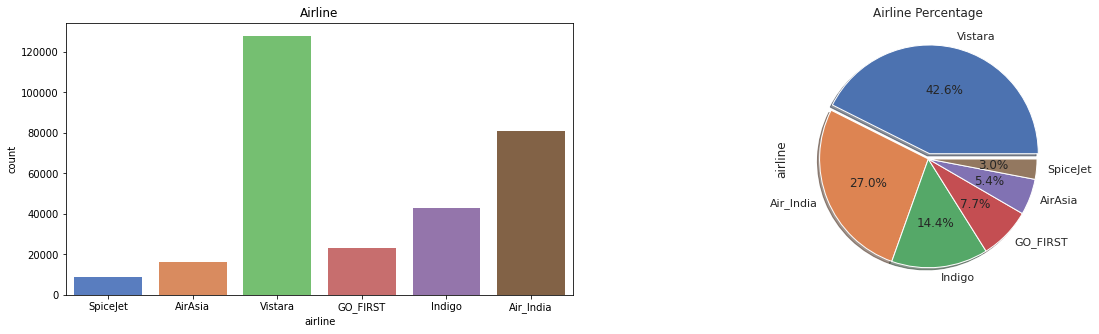

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(x='airline', data=data, palette='muted')
sns.set_theme(style="whitegrid")
plt.title('Airline')


plt.subplot(1, 2, 2)
data['airline'].value_counts().plot(kind='pie', explode=[0.05, 0, 0, 0 ,0 ,0], autopct='%1.1f%%', shadow=True)
plt.title('Airline Percentage')

plt.show()

Visual di atas menunjukan data kita memiliki 6 maskapai penerbangan dimana maskapai yang paling banyak digunakan adalah Vistara sebanyak 42.6% dari data kita dan yang paling jarang digunakan adalah SpiceJet sebanyak 3% dari data kita.

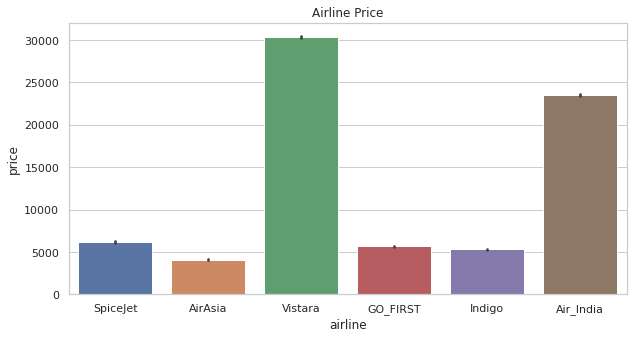

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x='airline',y='price',data=data)
plt.title('Airline Price')
plt.show()

Kita bisa lihat bahwa Vistara memiliki rata-rata harga termahal dibandingkan maskapai lainnya, meskipun demikian maskapai Vistara tetap menjadi maskapai yang paling banyak digunakan di India.

## Source and Destination City

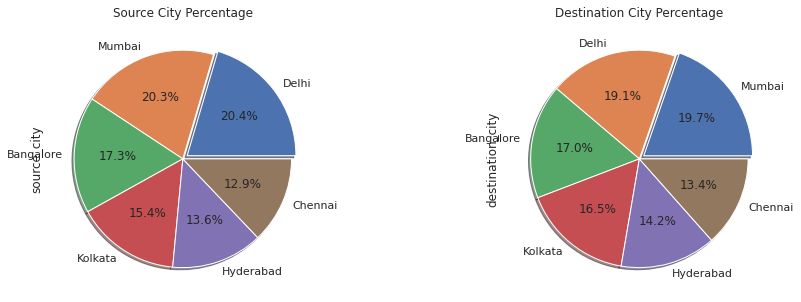

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['source_city'].value_counts().plot(kind='pie', explode=[0.05, 0, 0, 0 ,0 ,0], autopct='%1.1f%%', shadow=True)
plt.title('Source City Percentage')

plt.subplot(1, 2, 2)
data['destination_city'].value_counts().plot(kind='pie', explode=[0.05, 0, 0, 0 ,0 ,0], autopct='%1.1f%%', shadow=True)
plt.title('Destination City Percentage')

plt.show()

Chart di atas menunjukan dataset kita terdapat 6 kota awal dan 6 kota tujuan yang sama yaitu Delhi, Mumbai, Bangalore, Chennai, Kolkata, dan Hyderabad. Kita bisa lihat banyak orang yang berangkat dari Delhi dikarenakan Delhi merupakan ibukota India sehingga akan lebih ramai.

## Departure and Arrival Time

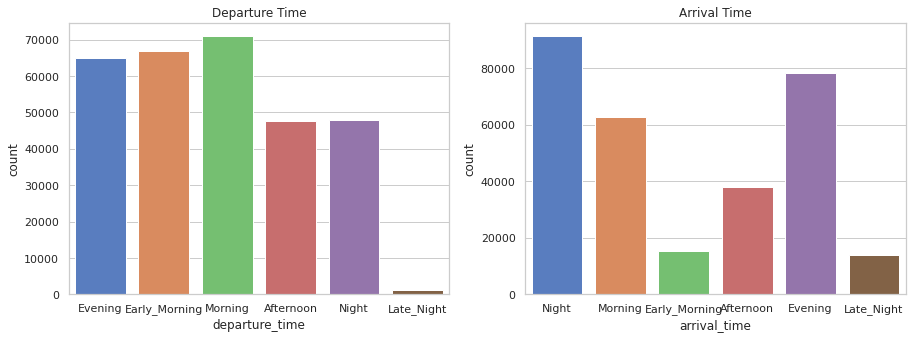

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='departure_time', data=data, palette='muted')
sns.set_theme(style="whitegrid")
plt.title('Departure Time')

plt.subplot(1, 2, 2)
sns.countplot(x='arrival_time', data=data, palette='muted')
sns.set_theme(style="whitegrid")
plt.title('Arrival Time')

plt.show()

Kita bisa melihat bahwa lebih banyak orang memilih untuk menggunakan pesawat pada pagi hari untuk berangkat dan ternyata kebanyakan pesawat di India mendarat pada sore atau malam hari.

## Stops

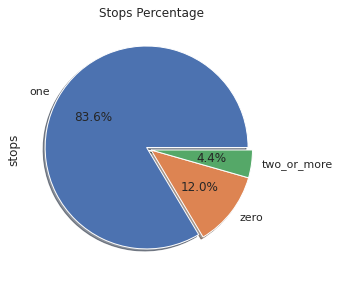

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
data['stops'].value_counts().plot(kind='pie', explode=[0.05, 0, 0], autopct='%1.1f%%', shadow=True)
plt.title('Stops Percentage')
plt.show()

Stops atau biasa juga disebut dengan transit juga terdapat di India. Ternyata kebanyakan penerbangan di India melakukan transit satu kali sebelum sampai tujuan dengan jumlah mencapai 83.6% dari keseluruhan data, sedangkan yang langsung sampai tujuan tanpa transit hanya 12%.

## Class

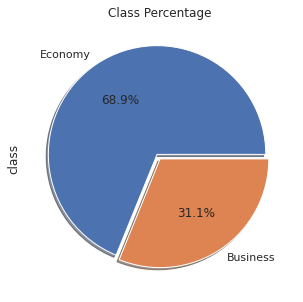

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
data['class'].value_counts().plot(kind='pie', explode=[0.05, 0], autopct='%1.1f%%', shadow=True)
plt.title('Class Percentage')
plt.show()

Maskapai penerbangan ternyata memiliki 2 class yang bisa dipilih yaitu economy dan bisnis, dimana sebanyak 68.9% orang memilih menggunakan economy dan 31.1% sisanya memilih bisnis.

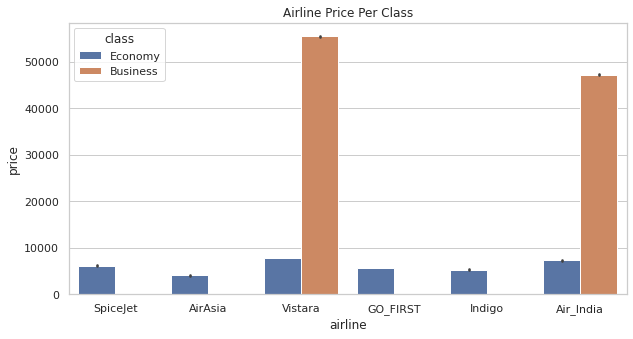

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x='airline',y='price', hue='class' ,data=data)
plt.title('Airline Price Per Class')
plt.show()

Grafik di atas menunjukan ternyata hanya ada dua maskapai penerbangan yang memiliki kelas bisnis yaitu Vistara dan Air India sedangkan 4 lainnya tidak punya kelas bisnis. Kemungkinan besar kelas bisnis pada Vistara yang membuat rata-rata harganya menjadi tinggi, namun kelas bisnis itu juga yang bisa menjadi penyebab banyak orang menggunakan Vistara.

## Duration

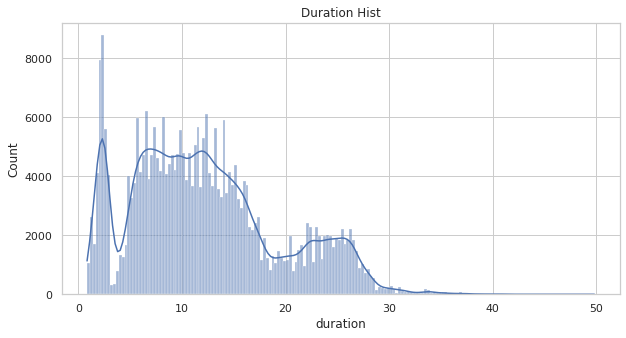

12.221020812718846

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'duration', data = data, kde = True)
plt.title('Duration Hist')
plt.show()
data.duration.mean()

In [18]:
data.duration.describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

Kita bisa melihat beragam durasi penerbangan pada visual di atas, dimana rata-rata penerbangan memakan waktu 12 jam. Meskipun hanya antar kota namun durasinya banyak yang melebihi 5 jam dikarenakan terhitung juga durasi transitnya.

## Days Left

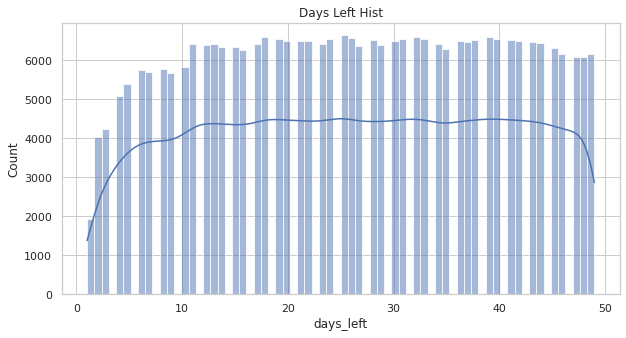

26.004750910369044

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'days_left', data = data, kde = True)
plt.title('Days Left Hist')
plt.show()
data.days_left.mean()

In [20]:
data.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

Days Left merupakan jarak waktu pemesanan tiket dan juga waktu keberangkatan dimana rata-rata orang memesan 26 hari sebelum keberangkatan.

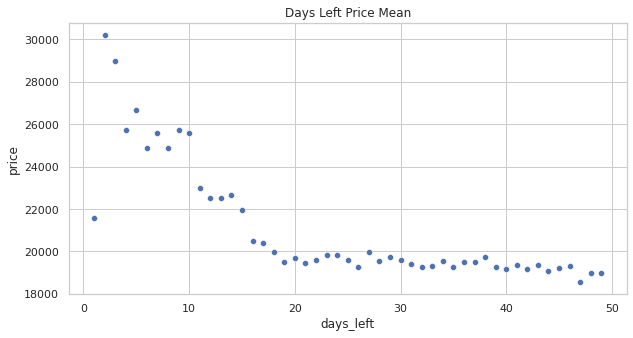

In [21]:
dl = data.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.scatterplot(x='days_left', y='price', data = dl)
plt.title('Days Left Price Mean')
plt.show()

Scatterplot diatas menunjukan pengaruh jarak pemesanan dengan harga dan bisa kita lihat bahwa harga tiket stabil lebih murah jika kita memesan 20-50 hari sebelum keberangkatan, namun di bawah 20 hari harganya mulai melonjak tinggi dan uniknya akan turun lagi 1 hari sebelum keberangkatan karena biasanya akan lebih murah untuk memenuhi bangku pesawat.

## Price (Target)

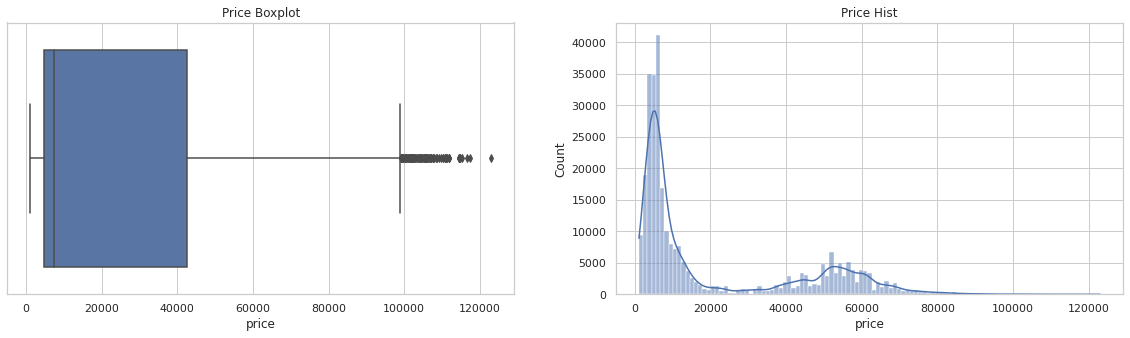

In [22]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = data)
plt.title('Price Boxplot')

plt.subplot(1,2,2)
sns.histplot(x = 'price', data = data, kde = True)
plt.title('Price Hist')

plt.show()

In [23]:
data.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

Kita bisa melihat persebaran harga tiket pesawat pada data kita dimana harga termurah adalah 1105 rupee dan harga tertinggi adalah 123071 rupee dengan rata-rata harga 20890 rupee.

# Data Preprocessing

## Get Data Inference

In [24]:
data_inf = data.sample(25, random_state=7)
data_inf

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
37442,Vistara,UK-705,Delhi,Early_Morning,two_or_more,Evening,Chennai,Economy,12.42,16,14293
26706,Vistara,UK-951,Delhi,Afternoon,one,Evening,Kolkata,Economy,26.50,38,6821
172802,Vistara,UK-878,Hyderabad,Afternoon,one,Evening,Kolkata,Economy,27.92,20,9079
240001,Vistara,UK-902,Mumbai,Afternoon,one,Morning,Hyderabad,Business,17.92,29,58125
82508,Air_India,AI-809,Mumbai,Morning,one,Morning,Chennai,Economy,22.92,38,5152
173133,Indigo,6E-913,Hyderabad,Morning,one,Night,Kolkata,Economy,8.75,23,5750
46270,Indigo,6E-2047,Mumbai,Early_Morning,zero,Morning,Delhi,Economy,2.25,19,2339
2118,Indigo,6E-6278,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,13,5955
282824,Air_India,AI-543,Hyderabad,Morning,one,Night,Bangalore,Business,10.33,46,56590
40422,GO_FIRST,G8-423,Delhi,Early_Morning,one,Evening,Chennai,Economy,9.83,34,3475


In [25]:
# Menghapus inference set dari dataset awal

data = data.drop(data_inf.index)
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [26]:
# Reset index pada data Inference

data_inf.reset_index(drop=True, inplace=True)
data_inf

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,UK-705,Delhi,Early_Morning,two_or_more,Evening,Chennai,Economy,12.42,16,14293
1,Vistara,UK-951,Delhi,Afternoon,one,Evening,Kolkata,Economy,26.50,38,6821
2,Vistara,UK-878,Hyderabad,Afternoon,one,Evening,Kolkata,Economy,27.92,20,9079
3,Vistara,UK-902,Mumbai,Afternoon,one,Morning,Hyderabad,Business,17.92,29,58125
4,Air_India,AI-809,Mumbai,Morning,one,Morning,Chennai,Economy,22.92,38,5152
5,Indigo,6E-913,Hyderabad,Morning,one,Night,Kolkata,Economy,8.75,23,5750
6,Indigo,6E-2047,Mumbai,Early_Morning,zero,Morning,Delhi,Economy,2.25,19,2339
7,Indigo,6E-6278,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,13,5955
8,Air_India,AI-543,Hyderabad,Morning,one,Night,Bangalore,Business,10.33,46,56590
9,GO_FIRST,G8-423,Delhi,Early_Morning,one,Evening,Chennai,Economy,9.83,34,3475


## Split Between Train and Test

In [27]:
# Splitting between `X` (Features) and `y` (Targets)

X = data.drop('price', axis=1)
y = data['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Train Size : ", X_train.shape)
print("Test Size : ", X_test.shape)

Train Size :  (240102, 10)
Test Size :  (60026, 10)


## Handling Missing Values

Kita akan mengecek missing values pada Train dan Test Set kita.

### Train Set

In [29]:
X_train.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [30]:
y_train.isnull().sum()

0

Ternyata tidak ada missing values pada train set.

### Test Set

In [31]:
X_test.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [32]:
y_test.isnull().sum()

0

Test set juga tidak ada missing values pada semua kolom.

## Handling Outliers

Kita pertama akan mengecek distribusi datanya untuk menentukan metode handling outliersnya.

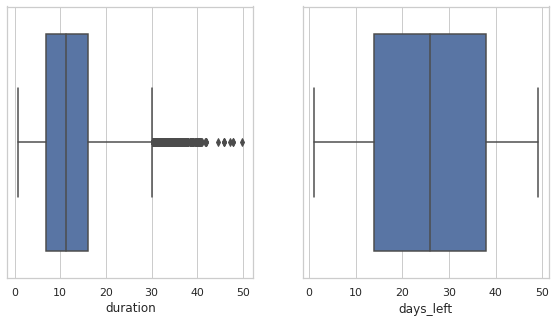

In [33]:
plt.figure(figsize=(15, 5))
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
for i in X_train[num_cols]:
    plt.subplot(1, 3, X_train[num_cols].columns.get_loc(i) + 1)
    sns.boxplot(x=i, data=X_train[num_cols])
plt.show()

In [34]:
X_train['duration'].skew()

0.6024758517836868

Ternyata kolom duration memiliki beberapa outliers dan distribusinya bertipe skewed, maka dari itu akan dilakukan pengecekan jumlah outliers menggunakan iqr


In [35]:
def find_skewed_boundaries(df, variable, distance): # untuk distribusi skewed
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [36]:
# Mengecek jumlah outliers capital_gain

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'duration', 1.5)

print('Jumlah Data Train: {}'.format(len(X_train)))
print('Jumlah data di luar upper boundary : {}'.format(len(X_train[X_train['duration'] > upper_boundary])))
print('Jumlah data di luar lower boundary : {}'.format(len(X_train[X_train['duration'] < lower_boundary])))
print('')
print('% upper boundary outliers : {}'.format(len(X_train[X_train['duration'] > upper_boundary]) / len(X_train) * 100))
print('% lower boundary outliers  : {}'.format(len(X_train[X_train['duration'] < lower_boundary]) / len(X_train) * 100))

Jumlah Data Train: 240102
Jumlah data di luar upper boundary : 1679
Jumlah data di luar lower boundary : 0

% upper boundary outliers : 0.6992861367252251
% lower boundary outliers  : 0.0


Karen jumlah outliers sangat sedikit jadi akan kita biarkan saja karena data tersebut juga penting dan bisa mempengaruhi harga.

## Feature Selection

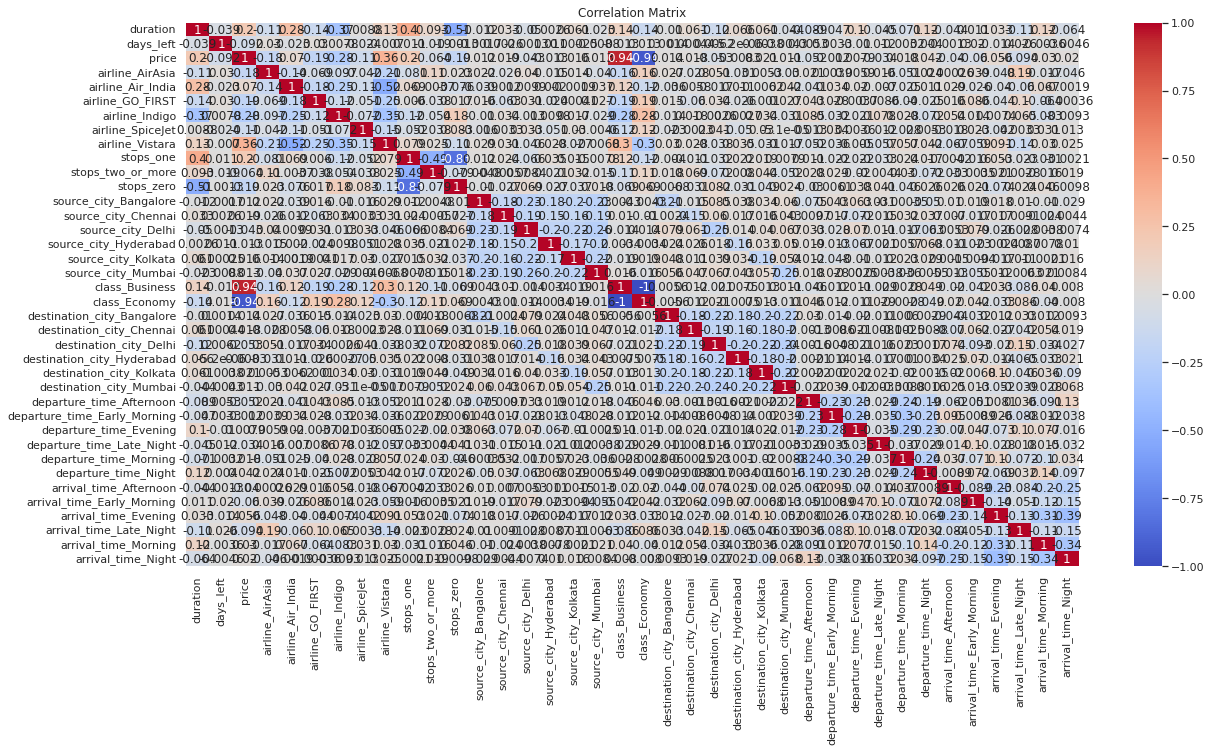

In [37]:
corr1 = pd.concat([data, pd.get_dummies(data[['airline','stops', 'source_city', 'class', 'destination_city', 'departure_time', 'arrival_time']])], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Berdasarkan correlation di atas dan personal jugdement saya semua kolom dalam dataset ini mempengaruhi harga kecuali `flight`, sehingga kita akan drop kolom `flight`

In [38]:
X_train.drop(columns=['flight'], inplace=True)
X_test.drop(columns=['flight'], inplace=True)

X_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
22589,Air_India,Delhi,Morning,one,Afternoon,Kolkata,Economy,27.58,16
50767,SpiceJet,Mumbai,Evening,zero,Night,Delhi,Economy,2.42,40
164588,GO_FIRST,Hyderabad,Morning,one,Night,Mumbai,Economy,13.25,42
191441,Vistara,Chennai,Morning,one,Night,Mumbai,Economy,9.33,31
126250,Air_India,Kolkata,Afternoon,one,Evening,Delhi,Economy,29.17,42
...,...,...,...,...,...,...,...,...,...
235095,Air_India,Mumbai,Evening,one,Morning,Kolkata,Business,15.00,14
10744,AirAsia,Delhi,Morning,zero,Afternoon,Bangalore,Economy,2.83,6
49698,AirAsia,Mumbai,Afternoon,one,Late_Night,Delhi,Economy,12.25,35
189655,Vistara,Chennai,Evening,one,Afternoon,Mumbai,Economy,20.83,18


## Split Between Numerical and Categorical Column

In [39]:
# Mendapatkan list Numerical columns sesuai tiper persebarannya dan Categorical columns

num_cols_norm = ['days_left']
num_cols_skew = ['duration']
cat_cols_oht = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
cat_cols_ord = ['stops', 'class']

print('Normal Numerical Columns : ', num_cols_norm)
print('Skewed Numerical Columns : ', num_cols_skew)
print('Ordinal Categorical Columns : ', cat_cols_ord)
print('Categorical Columns : ', cat_cols_oht)

Normal Numerical Columns :  ['days_left']
Skewed Numerical Columns :  ['duration']
Ordinal Categorical Columns :  ['stops', 'class']
Categorical Columns :  ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']


## Feature Engineering

Kita akan memisahkan Scaling dan Encoding sesuai dengan tipe persebaran dan tipe datanya.

In [40]:
# Numeric Features Scaling
num_skew = Pipeline([('scaling', MinMaxScaler())])
num_norm = Pipeline([('scaling', StandardScaler())])
cat_ord = Pipeline([('encoding', OrdinalEncoder())])
cat_oht = Pipeline([('encoding', OneHotEncoder())])

# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('norm_scale', num_norm, num_cols_norm),
    ('skew_scale', num_skew, num_cols_skew),
    ('ord_encode', cat_ord, cat_cols_ord),
    ('oht_encode', cat_oht, cat_cols_oht)
])

# Model Definition

In [41]:
# Linear Regression Pipeline
log_pipe = Pipeline([('preprocessing', preprocess), ('log', LinearRegression())])

# Lasso Pipeline
las_pipe = Pipeline([('preprocessing', preprocess), ('las', Lasso(alpha=0.01))])

# Ridge Pipeline
rdg_pipe = Pipeline([('preprocessing', preprocess), ('rdg', Ridge())])

# AdaBoost Pipeline
ada_pipe = Pipeline([('preprocessing', preprocess), ('ada', AdaBoostRegressor())])

# Model Training

In [42]:
# Training model

%time log_pipe.fit(X_train, y_train)
%time las_pipe.fit(X_train, y_train)
%time rdg_pipe.fit(X_train, y_train)
%time ada_pipe.fit(X_train, y_train)

CPU times: user 1.25 s, sys: 431 ms, total: 1.68 s
Wall time: 1.25 s
CPU times: user 1min 2s, sys: 48.3 s, total: 1min 51s
Wall time: 57.4 s
CPU times: user 932 ms, sys: 116 ms, total: 1.05 s
Wall time: 934 ms
CPU times: user 9.86 s, sys: 82.2 ms, total: 9.94 s
Wall time: 9.92 s


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm_scale',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['days_left']),
                                                 ('skew_scale',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['duration']),
                                                 ('ord_encode',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder())]),
                                                  ['stops', 'class']),
                                                 ('oht_encode',
           

# Model Evaluation

## Cross-Val

Melakukan model evaluation menggunakan cross validation score untuk mencari model terbaik.

In [43]:
scores_log = cross_val_score(log_pipe, X_train, y_train, cv=5, scoring='r2')
scores_rdg = cross_val_score(rdg_pipe, X_train, y_train, cv=5, scoring='r2')
scores_ada = cross_val_score(ada_pipe, X_train, y_train, cv=5, scoring='r2')
scores_las = cross_val_score(las_pipe, X_train, y_train, cv=5, scoring='r2')

In [44]:
print('----Linear Regression----')
print(f'Linear Mean : {scores_log.mean()}')
print(f'Linear Std : {scores_log.std()}')
print('')
print('----Ridge Regression----')
print(f'Rigde Mean : {scores_rdg.mean()}')
print(f'Ridge Std : {scores_rdg.std()}')
print('')
print('----Lasso Regression Tree----')
print(f'Lasso Mean : {scores_las.mean()}')
print(f'Lasso Std : {scores_las.std()}')
print('')
print('----AdaBoost----')
print(f'AdaBoost Mean : {scores_ada.mean()}')
print(f'AdaBoost Std : {scores_ada.std()}')

----Linear Regression----
Linear Mean : 0.9092732116887483
Linear Std : 0.0007438590965874963

----Ridge Regression----
Rigde Mean : 0.9092698696184858
Ridge Std : 0.000744179150367798

----Lasso Regression Tree----
Lasso Mean : 0.9092732115380141
Lasso Std : 0.0007438736863439706

----AdaBoost----
AdaBoost Mean : 0.9331503844642425
AdaBoost Std : 0.0017558099459814252


Dari hasil cross validation score di atas kita bisa melihat bahwa model AdaBoost mendapatkan rata-rata R2 score tertinggi yaitu 0.92 dengan standar deviasi yang sangat rendah, namun akan kita pastikan lagi apakah overfit atau tidak pada train dan test set.

In [45]:
# Model Evaluation Using MAE and R2
print('AdaBoost Model')
print('')
print('Train-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_train, ada_pipe.predict(X_train)))
print(f'Train-Set R2 Score: {r2_score(y_train, ada_pipe.predict(X_train))}')
print('')
print('Test-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_test, ada_pipe.predict(X_test)))
print(f'Test-Set R2 Score: {r2_score(y_test, ada_pipe.predict(X_test))}')

AdaBoost Model

Train-Set Mean Absolute Error (MAE):  3835.267515509851
Train-Set R2 Score: 0.9306235298789949

Test-Set Mean Absolute Error (MAE):  3862.9776886685936
Test-Set R2 Score: 0.929552933190616


Ternyata baseline model AdaBoost kita sudah goodfit dan menghasilkan score yang cukup baik, maka dari itu kita akan memilih AdaBoost untuk dilakukan hyperparameter tuning.

## Hyperparameter Tuning

Kita akan melakukan hyperparamter tuning menggunkan gridsearch

In [46]:
param_ada = {'ada__n_estimators': [50, 100],
             'ada__learning_rate' : [0.1, 0.2]}

In [47]:
grid_ada = GridSearchCV(ada_pipe, param_grid=param_ada, cv=5, n_jobs=-1, return_train_score=True)

In [48]:
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('norm_scale',
                                                                         Pipeline(steps=[('scaling',
                                                                                          StandardScaler())]),
                                                                         ['days_left']),
                                                                        ('skew_scale',
                                                                         Pipeline(steps=[('scaling',
                                                                                          MinMaxScaler())]),
                                                                         ['duration']),
                                                                        ('ord_encode',
                                                                

In [49]:
grid_ada.best_params_

{'ada__learning_rate': 0.2, 'ada__n_estimators': 50}

Ternyata model ADA Boost menghasilkan score paling tinggi menggunakan parameter learning_rate 0.2 dan n_estimator 50

In [50]:
# Model Evaluation Using MAE and R2
print('AdaBoost Model')
print('')
print('Train-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_train, grid_ada.best_estimator_.predict(X_train)))
print(f'Train-Set R2 Score: {r2_score(y_train, grid_ada.best_estimator_.predict(X_train))}')
print('')
print('Test-Set Mean Absolute Error (MAE): ', mean_absolute_error(y_test, grid_ada.best_estimator_.predict(X_test)))
print(f'Test-Set R2 Score: {r2_score(y_test, grid_ada.best_estimator_.predict(X_test))}')

AdaBoost Model

Train-Set Mean Absolute Error (MAE):  3536.433334136387
Train-Set R2 Score: 0.9365670821593904

Test-Set Mean Absolute Error (MAE):  3564.8154778796033
Test-Set R2 Score: 0.9354561452426463


Model AdaBoost setelah di tuning berhasil mendapatkan nilai MAE dan R2 Score yang lebih bagus dari pada baseline model. Pada Train bisa mendapatkan MAE sebesar 3545 dan R2 score sebesar 0.93 sedangkan pada Test Set mendapatkan nilai MAE sebesar 3574 dan R2 Score 0.93 yang artinya masih goodfit karena gap tidak terlalu besar.

# Model Inference

In [51]:
# Display inference set
data_inf.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,UK-705,Delhi,Early_Morning,two_or_more,Evening,Chennai,Economy,12.42,16,14293
1,Vistara,UK-951,Delhi,Afternoon,one,Evening,Kolkata,Economy,26.50,38,6821
2,Vistara,UK-878,Hyderabad,Afternoon,one,Evening,Kolkata,Economy,27.92,20,9079
3,Vistara,UK-902,Mumbai,Afternoon,one,Morning,Hyderabad,Business,17.92,29,58125
4,Air_India,AI-809,Mumbai,Morning,one,Morning,Chennai,Economy,22.92,38,5152


In [52]:
data_inf.drop(columns=['flight', 'price'])

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Vistara,Delhi,Early_Morning,two_or_more,Evening,Chennai,Economy,12.42,16
1,Vistara,Delhi,Afternoon,one,Evening,Kolkata,Economy,26.50,38
2,Vistara,Hyderabad,Afternoon,one,Evening,Kolkata,Economy,27.92,20
3,Vistara,Mumbai,Afternoon,one,Morning,Hyderabad,Business,17.92,29
4,Air_India,Mumbai,Morning,one,Morning,Chennai,Economy,22.92,38
5,Indigo,Hyderabad,Morning,one,Night,Kolkata,Economy,8.75,23
6,Indigo,Mumbai,Early_Morning,zero,Morning,Delhi,Economy,2.25,19
7,Indigo,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,13
8,Air_India,Hyderabad,Morning,one,Night,Bangalore,Business,10.33,46
9,GO_FIRST,Delhi,Early_Morning,one,Evening,Chennai,Economy,9.83,34


In [53]:
# melakukan predict pada inference set
y_pred_inf = grid_ada.best_estimator_.predict(data_inf)

In [54]:
# Membuat hasil prediksi menjadi dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price_Pred'])

In [55]:
pred_inf = pd.concat([data_inf['price'], y_pred_inf_df], axis=1)
pred_inf

,price,Price_Pred
0,14293,5855.736557
1,6821,5668.856546
2,9079,5668.856546
3,58125,58904.374980
4,5152,5588.712213
5,5750,5588.712213
6,2339,3227.194899
7,5955,9332.649730
8,56590,49517.049350
9,3475,5588.712213


In [56]:
# Model Evaluation Using MAE and R2
print('AdaBoost Model')
print('')
print('Inference-Set Mean Absolute Error (MAE): ', mean_absolute_error(data_inf['price'], y_pred_inf))
print(f'Inference-Set R2 Score: {r2_score(data_inf.price, y_pred_inf)}')

AdaBoost Model

Inference-Set Mean Absolute Error (MAE):  2983.982985997887
Inference-Set R2 Score: 0.9569727292456109


Model ADA Boost hasil tuning berhasil mendapatkan score cukup baik pada Inference set dimana mendapatkan MAE sebesar 2983 dan R2 score sebesar 0.95.

# Kesimpulan

Dataset ini berisi informasi mengenai detail pemesanan tiket pesawat di India. Dataset ini berisi 6 maskapai penerbangan dengan 6 destinasi awal dan destinasi tujuan. Dari 6 maskapai penerbangan ternyata orang India paling banyak menggunakan maskapai Vistara dan paling jarang menggunakan SpiceJet. Kita juga bisa lihat dari 6 maskapai hanya ada 2 yang memiliki kelas bisnis yaitu Vistara dan Air India dimana hal itu menyebabkan Vistara dan Air India menjadi 2 maskapai dengan rata-rata tiket termahal. Dari 6 destinasi ternyata yang paling banyak dikunjungi adalah Mumbai dan disusul oleh Delhi dimana memang 2 kota terebut adalah kota ramai dan besar di India. Penerbangan di India juga memiliki transit, bahkan mayoritas penerbangan melakukan transit satu kali sebelum mencapai tujuan. Untuk pemesanan tiket bisa dilakukan sehari sebelum bahkan sampai 49 hari sebelum keberangkatan dimana harganya akan beragam tergantung jarak waktu pemesanan dan keberangkatan.

Dari hasil EDA dan personal judgement semua kolom bisa mempengaruhi harga kecuali nomor penerbangan, jadi akan digunakan semua kolom kecuali nomor penerbangan untuk memprediksi harga tiket pesawat.

Model yang dipilih awalnya ada 4 model regressi yaitu Linear Regression, Ridge Regression, Lasso Regression, dan AdaBoost. Keempat model tersebut ditest menggunakan cross validation untuk mencari rata-rata score terbaik.

Model AdaBoost berhasil mendapatkan rata-rata cross validation score terbaik yaitu 0.92 dengan standar deviasi yang sangat rendah. Selanjutnya model ADA Boost dicari hyperparameter terbaiknya menggunakan gridsearch. ADA Boost baseline model berhasil mendapatkan nilai MAE 3835 dan R2 Score 0.93 pada Train set dan nilai MAE 3862 dan R2 Score 0.929 pada Test Set. Setelah dilakukan hyperparamter tuning menggunakan gridsearch, ADA Boost berhasil mendapatkan hasil yang lebih baik yaitu nilai MAE 3536 dan R2 score 0.936 pada Train Set dan nilai MAE 3564 dan R2 score 0.935 pada Test Set. Model hasil hyperparameter tuning berhasil mengalahkan baseline model dan tetap goodfit.

Pada Inference Set, model AdaBoost hasil tuning juga bisa mendapatkan hasil yang sangat baik yaitu menghasilkan nilai MAE sebesar 2983 dan R2 score sebesar 0.956. Artinya model kita bisa memprediksi harga dengan kemungkinan salah 2983 rupee lebih tinggi atau lebih rendah dari harga aslinya.

# Model Saving

In [57]:
with open('model_ada.pkl', 'wb') as file_1:
  joblib.dump(grid_ada.best_estimator_, file_1)